# **PABLO NERUDA'S POEM WRITTEN BY AI**

I have compiled Pablo Neruda's 60 poems into a .txt file. This file is uploaded in the google drive so that Google Colab can easily run the file any time I want without having to re-upload it again after 12 hours, as we know, Google Colab Environment removes any file uploaded after 12 hours. This saves time and others can easily upload the file too with giving the correct File path.

Below are the libraries which are being used by the Project. Now, this code has been taken from [TensorFlow Tutorials](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=6Vc6PHgxa6Hm) which can be found in this link or you can search for the playlist on YouTube which clearly explains all the concepts required to understand NLP. Search for Tensorflow NLP Playlist on YouTube and you will easily find the playlist.



Although, the tutorial is used by me, I have made some changes to the code such that the preprocessing is easier and it gives a better accuracy than it was giving in the link I have attached.



In the tutorial an Irish song is used which has good number of words in a line. The problem lies with poem as they don't have a fixed number of words in a line so they can either be too short or too long. This creates problem with making poems accurate so I used a whole paragraph as a sentence in the poem which gives up decent output as a poem. I have attached an output with this file. You can check that out.
---
1.) The libraries have been imported and I will try my best to exaplain all the reasoning behind the code.

1.1) Tensorflow has been imported.

1.2) pad_sequences are used such that all the sentences being sent for training are of equal words with equal length.

1.3) Embedding is used to determine semantic relationship between words such that the context is understood. Along with that, Dense model is being used which means all the neurons are interconnected in all the layers, Bidirectional LSTM is being used which is used to determine the relationship between words which are far away.

1.4) Tokenizer is used to assign token ( serial numbers ) to sentences.

1.5) Sequential means that the model being used is in a certain sequence which is that a particular layer precedes another layer and so on.

1.6) Adam is the optimizer being used here.

1.7) Numpy library is used.

1.8) nltk library for preprocessing of data is used.

1.9) re means regular expressions and it is used for data cleaning in the preprocessing stage.



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import nltk
import re
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

This takes the authorization to use Google Drive.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.1)Tokenizer is the class being called and the 'tokenizer' variable is the instance of the Tokenizer() class.

2.2)The file path to the text file can be found by copying file path.

2.3)'clean' variable is used to make sentences of the text file.

2.4)'corpus' variable is used to store the words generated after cleaning of the data in the file.

2.5)Now a loop is run until the length of the sentences in the Pablo Neruda text  file

2.6)The first review clears the file of everything except the text and replaces other characters other than text with whitespace.

2.7)The second review lowers all the characters to lowercase.

2.8)The third review splits the sentences on the basis of whitespace.

2.9)The fourth review joins the sentences with whitepsace.

2.10)The setences contained in review are then appended to the back of the corpus variable.

2.11)Now numbers are alloted to the words in the corpus variable.

2.12)The total number of unique words are saved in 'total_words' variable.


In [3]:
tokenizer = Tokenizer()                                                           #2.1

data = open('/content/drive/My Drive/Poem AI/Pablo Neruda.txt').read()            #2.2
clean = nltk.sent_tokenize(data)                                                  #2.3
                           
corpus = []                                                                       #2.4                                               
for i in range(0, len(clean)):                                                    #2.5
    review = re.sub('[^a-zA-Z]', ' ', clean[i])                                   #2.6
    review = review.lower()                                                       #2.7
    review = review.split()                                                       #2.8
    review = ' '.join(review)                                                     #2.9
    corpus.append(review)                                                         #2.10

print(corpus)

tokenizer.fit_on_texts(corpus)                                                    #2.11
total_words = len(tokenizer.word_index) + 1                                       #2.12

print(tokenizer.word_index)
print(total_words)

['i want you to know one thing', 'you know how this is if i look at the crystal moon at the red branch of the slow autumn at my window if i touch near the fire the impalpable ash or the wrinkled body of the log everything carries me to you as if everything that exists aromas light metals were little boats that sail toward those isles of yours that wait for me', 'well now if little by little you stop loving me i shall stop loving you little by little', 'if suddenly you forget me do not look for me for i shall already have forgotten you', 'if you think it long and mad the wind of banners that passes through my life and you decide to leave me at the shore of the heart where i have roots remember that on that day at that hour i shall lift my arms and my roots will set off to seek another land', 'but if each day each hour you feel that you are destined for me with implacable sweetness if each day a flower climbs up to your lips to seek me ah my love ah my own in me all that fire is repeated

3.1) The input_sequences are kept empty which will be filled further.

3.2) The whole loop is exaplained in this [video](https://www.youtube.com/watch?v=ZMudJXhsUpY&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=6) at the timestamp of 2:55. It does a much better job of visualizing the whole process which makes it easier to understand. In short, if you don't want to watch the video, it helps in maintaining a record as to which word succeeds the other.

3.3) 'max_sequences' takes the maximum length of sentences and then padding is done in front of the sentences so that equal length of all the sentences are made.

3.4) The input_sequences which are having the sentences are stored into two variables xs and labels. xs stores the padded sentences and labels stores the key of the words in the sentences. 

3.5) This is then passed to np.utils which converts the labels into One Hot Vector.


In [4]:
input_sequences = []                                                            #3.1
for line in corpus:                                                             
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):                                           #3.2 The whole loop
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])                       #3.3
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]                       #3.4
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)             #3.5

4.1) Sequential model is used.

4.2) The input layer is embedded such that words have meaning to them when being processed. There are 100 neurons in the layer and the input layer has 197 neuron which is maximum length minus 1.

4.3) Bidirectional LSTM is used which has 300 neurons. To understand LSTM, follow this [link](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) or you can watch this [video](https://youtu.be/rdkIOM78ZPk) who explains the link attached above for LSTM.

4.4) The output layer is a Dense layer which means all the neurons are fully connected and softmax activation function is used.

4.5) Adam optimizer is used with a learning rate of 0.01

4.6) As the data is categorical therefore categorical_crossentropy is used and metrics is measured in accuracy.

4.7) The model is then fit on xs value and the ys value taken from labels. The whole model is run 200 epochs which means the whole forward propogation and backward propogation will be done 200 times. 



In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=200, verbose=1)
#print model.summary()
print(model)


Epoch 1/200
272/272 [==============================] - 25s 93ms/step - loss: 6.4831 - accuracy: 0.0762
Epoch 2/200
272/272 [==============================] - 24s 89ms/step - loss: 5.5763 - accuracy: 0.1136
Epoch 3/200
272/272 [==============================] - 24s 88ms/step - loss: 4.7413 - accuracy: 0.1611
Epoch 4/200
272/272 [==============================] - 24s 87ms/step - loss: 3.7571 - accuracy: 0.2377
Epoch 5/200
272/272 [==============================] - 23s 85ms/step - loss: 2.8073 - accuracy: 0.3652
Epoch 6/200
272/272 [==============================] - 23s 86ms/step - loss: 1.9648 - accuracy: 0.5237
Epoch 7/200
272/272 [==============================] - 23s 86ms/step - loss: 1.4181 - accuracy: 0.6406
Epoch 8/200
272/272 [==============================] - 24s 86ms/step - loss: 1.0125 - accuracy: 0.7408
Epoch 9/200
272/272 [==============================] - 23s 85ms/step - loss: 0.7820 - accuracy: 0.8029
Epoch 10/200
272/272 [==============================] - 23s 85ms/step - l

This gives the summary of the model which means all the layers and the parameters included in them.

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 197, 100)          209500    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2095)              630595    
Total params: 1,141,295
Trainable params: 1,141,295
Non-trainable params: 0
_________________________________________________________________


5.1) This shows the model accuracy over the epochs and gives a graph for it.

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

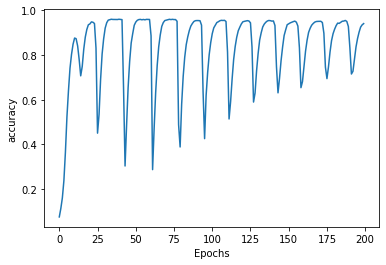

In [8]:
plot_graphs(history, 'accuracy')


6.1) The seed_text is the variable which stores a string value which is worked upon further.

6.2) The next_words is used to predict the total words further from seed_text

6.3) The loop is run till the number we put in next_words

6.4) token_list generates the token for words in the sentences successively.

6.5) Padding is done for the token_list with length till the sentence having maximum number of words.

6.6) The model is then used and the words are predicted based on the model which is trained above.

6.7) If the index is found for the predicted word in all the words, the words is then stored into output_word which then breaks the loop if the word is found.

6.8) After breaking of loop, the output_word is added to the seed text with a whitespace in between.

In [12]:

seed_text = "this is the story"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)


this is the story i have named you queen i kiss in kiss in kiss in never in the hand that rose the whip against the maestros of darkness of cold walking and the earth like if it had been made by our lips like the kiss the one against carnations in water like a river of buried jaguars and we bit each other as fire bites leaving wounds in us fire us this and sea that i will write us the sky and we don t now we our love the earth like if i kiss them s fall asleep it had no


7) I have joined this part to split the seed_text formed above into making a line for 5 words each. This then adds a newline and shifts the next 5 words to the next line.

In [13]:
words = seed_text.split()
new_text = ""
word_count = 0
for word in words:
    new_text += word + " "
    word_count += 1
    if word_count == 5:
        new_text += "\n"
        word_count = 0

8.) This then adds the output predicted for the Pablo Neruda poem to the 'Poem.txt' file which you can check in the GoogleDrive.

In [14]:
f = open("/content/drive/My Drive/Poem AI/Poem.txt", "w")
f.write(new_text)
f.close()